---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>

**4.** [**Data Acquisition**](#Section4)<br>
  - **4.1** [**Data Discription and Quality Check**](#Section41)
  - **4.2** [**Data Transformation and Cleaning**](#Section42)

**5.** [**Exploratory Data Analysis**](#Section5)<br>
  - **5.1** [**Overview of Data**](#Section51)

**6.** [**Premium Predection Model Development & Evaluation**](#Section6)<br>
  - **6.1** [**Feature Selection**](#Section61)<br>
  - **6.2** [**Encoding Categorical Variables**](#Section62)<br>
  - **6.3** [**Splitting Data and Initializing Regressors**](#Section63)<br>
  - **6.4** [**Training Regressors and Evaluating R2 Scores**](#Section64)<br>

**7.** [**Submission**](#Section7)<br>


---
<a name = Section1></a>
# **1. Introduction**
---

Medical insurance serves as a vital shield against the escalating costs of healthcare, providing individuals with financial protection and access to essential medical services. In the event of illness or injury, insurance covers hospitalization, surgeries, and medications, preventing individuals from shouldering the entire financial burden. Moreover, it promotes preventive care, encouraging regular check-ups and screenings for early detection of health issues. Despite concerns about premiums and administrative complexities, the security and peace of mind that medical insurance affords are invaluable. It not only ensures timely and quality healthcare but also safeguards individuals and families from the potentially devastating economic consequences of medical emergencies.

<center><img src="https://www.policybazaar.com/pblife/assets/images/pb_life_How_to_increase_Health_insurance_cover_1592063367.gif"></center>


**<h3>Advantages & Disadvantage of Insurance</h3>**

**<h5>Advantages of Medical Insurance:</h5>**

**Financial Protection**: Medical insurance provides financial coverage for the high costs associated with healthcare services, including hospitalization, surgeries, and prescription medications. This helps individuals manage medical expenses without facing significant financial strain.

**Access to Quality Healthcare:** With medical insurance, individuals have access to a network of healthcare providers, hospitals, and specialists. This ensures timely and quality medical care, leading to better health outcomes.

**Preventive Care:** Many health insurance plans cover preventive services such as vaccinations, screenings, and wellness check-ups. This emphasis on preventive care can lead to early detection of health issues and overall better health.

**Emergency and Critical Care Coverage:** Medical insurance provides coverage for emergency medical situations and critical care, offering peace of mind during unexpected health crises.

**Network Discounts:** Health insurance plans often negotiate discounted rates with healthcare providers within their network. This can result in lower out-of-pocket expenses for policyholders.


**<h5>Disadvantages of Medical Insurance:</h5>**

**Cost of Premiums:** The cost of medical insurance premiums can be a financial burden for some individuals and families. In some cases, people may feel they are paying for a service they don't use frequently.

**Limited Coverage and Exclusions:** Some medical insurance policies have limitations and exclusions, leading to situations where specific medical conditions or treatments may not be covered. It's essential for individuals to understand the scope of their coverage.

**Administrative Hassles:** Dealing with insurance paperwork, claim processing, and navigating the administrative aspects of medical insurance can be time-consuming and cumbersome.

**Risk of Premium Increases:** Like other types of insurance, medical insurance premiums may increase over time. This can be a concern for policyholders, particularly if the cost of coverage becomes a strain on their budget.

---
<a name = Section2></a>
# **2. Problem Statement**
---

**<h5> Digital Transformation of the insurance company </h5>**

**Digital Underwriting and Risk Assessment:**
Insurers are leveraging big data and machine learning algorithms for more accurate risk assessments. Digital underwriting processes analyze a vast array of data sources, including social media, to create personalized risk profiles, allowing insurers to offer tailored coverage and competitive premiums.

**Customer-Centric Digital Platforms:**
Insurers are investing heavily in user-friendly digital platforms. Mobile apps and online portals provide customers with easy access to policy information, claims status, and interactive tools for risk management. Chatbots powered by artificial intelligence enhance customer service and streamline communication.

**Blockchain for Smart Contracts and Claims Processing:**
The adoption of blockchain technology has streamlined the claims process. Smart contracts, executed automatically through blockchain, ensure faster and transparent claim settlements. The decentralized nature of blockchain enhances security and reduces fraud, fostering trust between insurers and policyholders.

The current process suffers from the following problems:


*   The company uses manpower to predict the medical expenses of its insurers. Many factors are considered such as age, BMI, smoking habits, number of children, etc.
*   It is a time and resource-intensive process and many times, inaccurate.
*   The company plans to modernize its legacy systems and wants to implement an automated way of predicting the medical expenses of its insurers based on various factor.



<a name = Section21></a>
### **Scenario**



- The **primary goals** on dataset analysis are as follows:

- **Statistical Analysis**: Conduct a **statistical analysis** to understand how specific groups of people are more likely to **subscribe** to a term deposit. Explore relationships between different features and the **target variable** to identify **patterns** and **correlations**.

- **Exploratory Data Analysis**: Perform an in-depth **exploratory data analysis** of the dataset. Utilize visualizations and storytelling techniques to uncover meaningful insights and present them in a compelling manner.

---
<a name = Section3></a>
# **3. Importing Libraries**
---

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV

---
<a name = Section4></a>
##**4. Data Acquisition**
---

- The **dataset** consists of the information about **Insurance charges of the customer based on age, bmi, Gender,etc.,**  of a **XYZ Insurance Company**.


| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 1003 | 08 | 62.8+ KB |

<br>

In [2]:
!unzip "/content/Medical-Cost-Prediction.zip"

Archive:  /content/Medical-Cost-Prediction.zip
  inflating: test_data.csv           
  inflating: train_data.csv          
  inflating: sample_submission.csv.xlsx  


In [3]:
data_train=pd.read_csv("/content/train_data.csv")
data_test=pd.read_csv("/content/test_data.csv")


| ID | Feature Name | Description of the feature |
| :-- | :--| :--|
|01| **Age**   | Indicates the age of the primary beneficiary(numeric)                    |
|02| **Sex**      | Indicates the gender of the insurance contractor  (categorical)               |
|03| **BMI**        | Indicates the BMI of the beneficiary(Continuous)        |
|04| **Children**          | Indicates number of children covered by health insurance / Number of dependents (categorical)   |
|05| **Smoker**           | Indicates whether the beneficiary has smoking habits? (binary: "yes", "no") (Categorical) |
|06| **Region**           | Indicates the region of residence of the beneficiary (Categorical) |
|07| **Id**     | Indicates the unique beneficiary id  |
|08| **Charges**     | Indicates the individual medical costs billed by health insurance (Continuous)|


The Train Set contains 1,003 rows and 8 columns, while the Test Set contains 335 rows and 7 columns. The Test Set does not include the **Charges** column, which needs to be predicted.

In [4]:
print('  Shape of the Data Set')
print('*'*40)
print("     Train Set : {}".format(data_train.shape))
print("     Test Set  : {}".format(data_test.shape))
print('*'*40)

  Shape of the Data Set
****************************************
     Train Set : (1003, 8)
     Test Set  : (335, 7)
****************************************


In [5]:
print("\t\t\t Train Data Head")
print("*"*70)
print(data_train.head())
print("*"*70)
print("\n\t\t\t Test Data Head")
print("*"*70)
print(data_test.head())
print("*"*70)

			 Train Data Head
**********************************************************************
   age     sex     bmi  children smoker     region    id      charges
0   24    male  23.655         0     no  northwest   693   2352.96845
1   28  female  26.510         2     no  southeast  1297   4340.44090
2   51    male  39.700         1     no  southwest   634   9391.34600
3   47    male  36.080         1    yes  southeast  1022  42211.13820
4   46  female  28.900         2     no  southwest   178   8823.27900
**********************************************************************

			 Test Data Head
**********************************************************************
   age     sex     bmi  children smoker     region    id
0   45  female  25.175         2     no  northeast   764
1   36  female  30.020         0     no  northwest   887
2   64  female  26.885         0    yes  northwest   890
3   46    male  25.745         3     no  northwest  1293
4   19    male  31.920         0    yes  n

<a name = Section42></a>
### **4.1 Data Description and Quality Check**



In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1003 non-null   int64  
 1   sex       1003 non-null   object 
 2   bmi       1003 non-null   float64
 3   children  1003 non-null   int64  
 4   smoker    1003 non-null   object 
 5   region    1003 non-null   object 
 6   id        1003 non-null   int64  
 7   charges   1003 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.8+ KB


In [7]:
data_train.describe(include="all")

,age,sex,bmi,children,smoker,region,id,charges
count,1003.000000,1003,1003.000000,1003.000000,1003,1003,1003.000000,1003.000000
unique,NaN,2,NaN,NaN,2,4,NaN,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN,NaN
freq,NaN,506,NaN,NaN,797,259,NaN,NaN
mean,39.255234,NaN,30.511780,1.104686,NaN,NaN,666.874377,13267.935817
std,14.039105,NaN,6.013107,1.204619,NaN,NaN,386.570442,12051.356547
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,0.000000,1121.873900
25%,27.000000,NaN,26.210000,0.000000,NaN,NaN,329.500000,4780.839400
50%,39.000000,NaN,30.200000,1.000000,NaN,NaN,675.000000,9447.382400
75%,51.000000,NaN,34.430000,2.000000,NaN,NaN,1001.500000,16840.667970


In [8]:
data_train.skew()

<ipython-input-8-4629a9665a3e>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_train.skew()


age         0.036805
bmi         0.289540
children    0.910284
id         -0.021560
charges     1.526521
dtype: float64

In [9]:
#Checking for the duplicate row in the DataSet
data_train.duplicated().sum()

0

<a name = Section42></a>
### **4.2 Data Transformation and Cleaning**


In [10]:
# Replacing Numeric value with String representaion in children column
data_train['children'].replace([0,1,2,3,4,5],["Zero",'One','Two','Three','Four','Five'],inplace=True)

In [11]:
#Extracting Categorical and Numerical Columns to preform Further Analysis & Cleaning
categorical_variable=data_train.select_dtypes("object").columns
numeric_variable=data_train.select_dtypes(['int64','float64']).columns
print("\n\n Having a look at unique values and null count in each column of the dataset")
print("*"*100)
for col in data_train.columns:
  unique_value=data_train[col].unique()
  num_unique=len(unique_value)
  null_count=data_train[col].isnull().sum()
  print("Column Name : {}".format(col))
  if col in categorical_variable:
    print("Data Type: Categorical \n\t   Unique Values : {} \n\t   Null Count    : {} \n\t   {} ".format(num_unique,null_count,unique_value))
    print('-'*70)
  else :
    print('Data Type: Numeric \n\t   Unique Values : {} \n\t   Null Count    : {} '.format(num_unique,null_count))
    print('-'*70)



 Having a look at unique values and null count in each column of the dataset
****************************************************************************************************
Column Name : age
Data Type: Numeric 
	   Unique Values : 47 
	   Null Count    : 0 
----------------------------------------------------------------------
Column Name : sex
Data Type: Categorical 
	   Unique Values : 2 
	   Null Count    : 0 
	   ['male' 'female'] 
----------------------------------------------------------------------
Column Name : bmi
Data Type: Numeric 
	   Unique Values : 484 
	   Null Count    : 0 
----------------------------------------------------------------------
Column Name : children
Data Type: Categorical 
	   Unique Values : 6 
	   Null Count    : 0 
	   ['Zero' 'Two' 'One' 'Three' 'Four' 'Five'] 
----------------------------------------------------------------------
Column Name : smoker
Data Type: Categorical 
	   Unique Values : 2 
	   Null Count    : 0 
	   ['no' 'yes'] 
----

In [12]:
data_train.isna().sum().any()

False

**Observations**
---
*   Charges Column is more Skewed towards Right side of the distribution.
*   It observed that no missing values found in the training dataset
*   Data type of all the variables are prefect
*   Dataset consist of 3 categorical features and 4 Numeric features
*   Children Column is considered to be categorical, So replacing the Numeric values with String representaion.




In [13]:
print("\t\t\t Dataset Post Check")
print("*"*100)
print("\t\t\t Dataset Head\n",data_train.head())
print("*"*100)
print("\t\t\t Dataset Information\n")
print(data_train.info())

			 Dataset Post Check
****************************************************************************************************
			 Dataset Head
    age     sex     bmi children smoker     region    id      charges
0   24    male  23.655     Zero     no  northwest   693   2352.96845
1   28  female  26.510      Two     no  southeast  1297   4340.44090
2   51    male  39.700      One     no  southwest   634   9391.34600
3   47    male  36.080      One    yes  southeast  1022  42211.13820
4   46  female  28.900      Two     no  southwest   178   8823.27900
****************************************************************************************************
			 Dataset Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1003 non-null   int64  
 1   sex       1003 non-null   object 
 2   bmi       1003 non-null   float64
 3   children  10

---
<a name = Section5></a>
# **5. Exploratory Data Analysis**<br>
---
<a name = Section51></a>
**5.1  Overview of Data**

**Uni-variant Analysis**

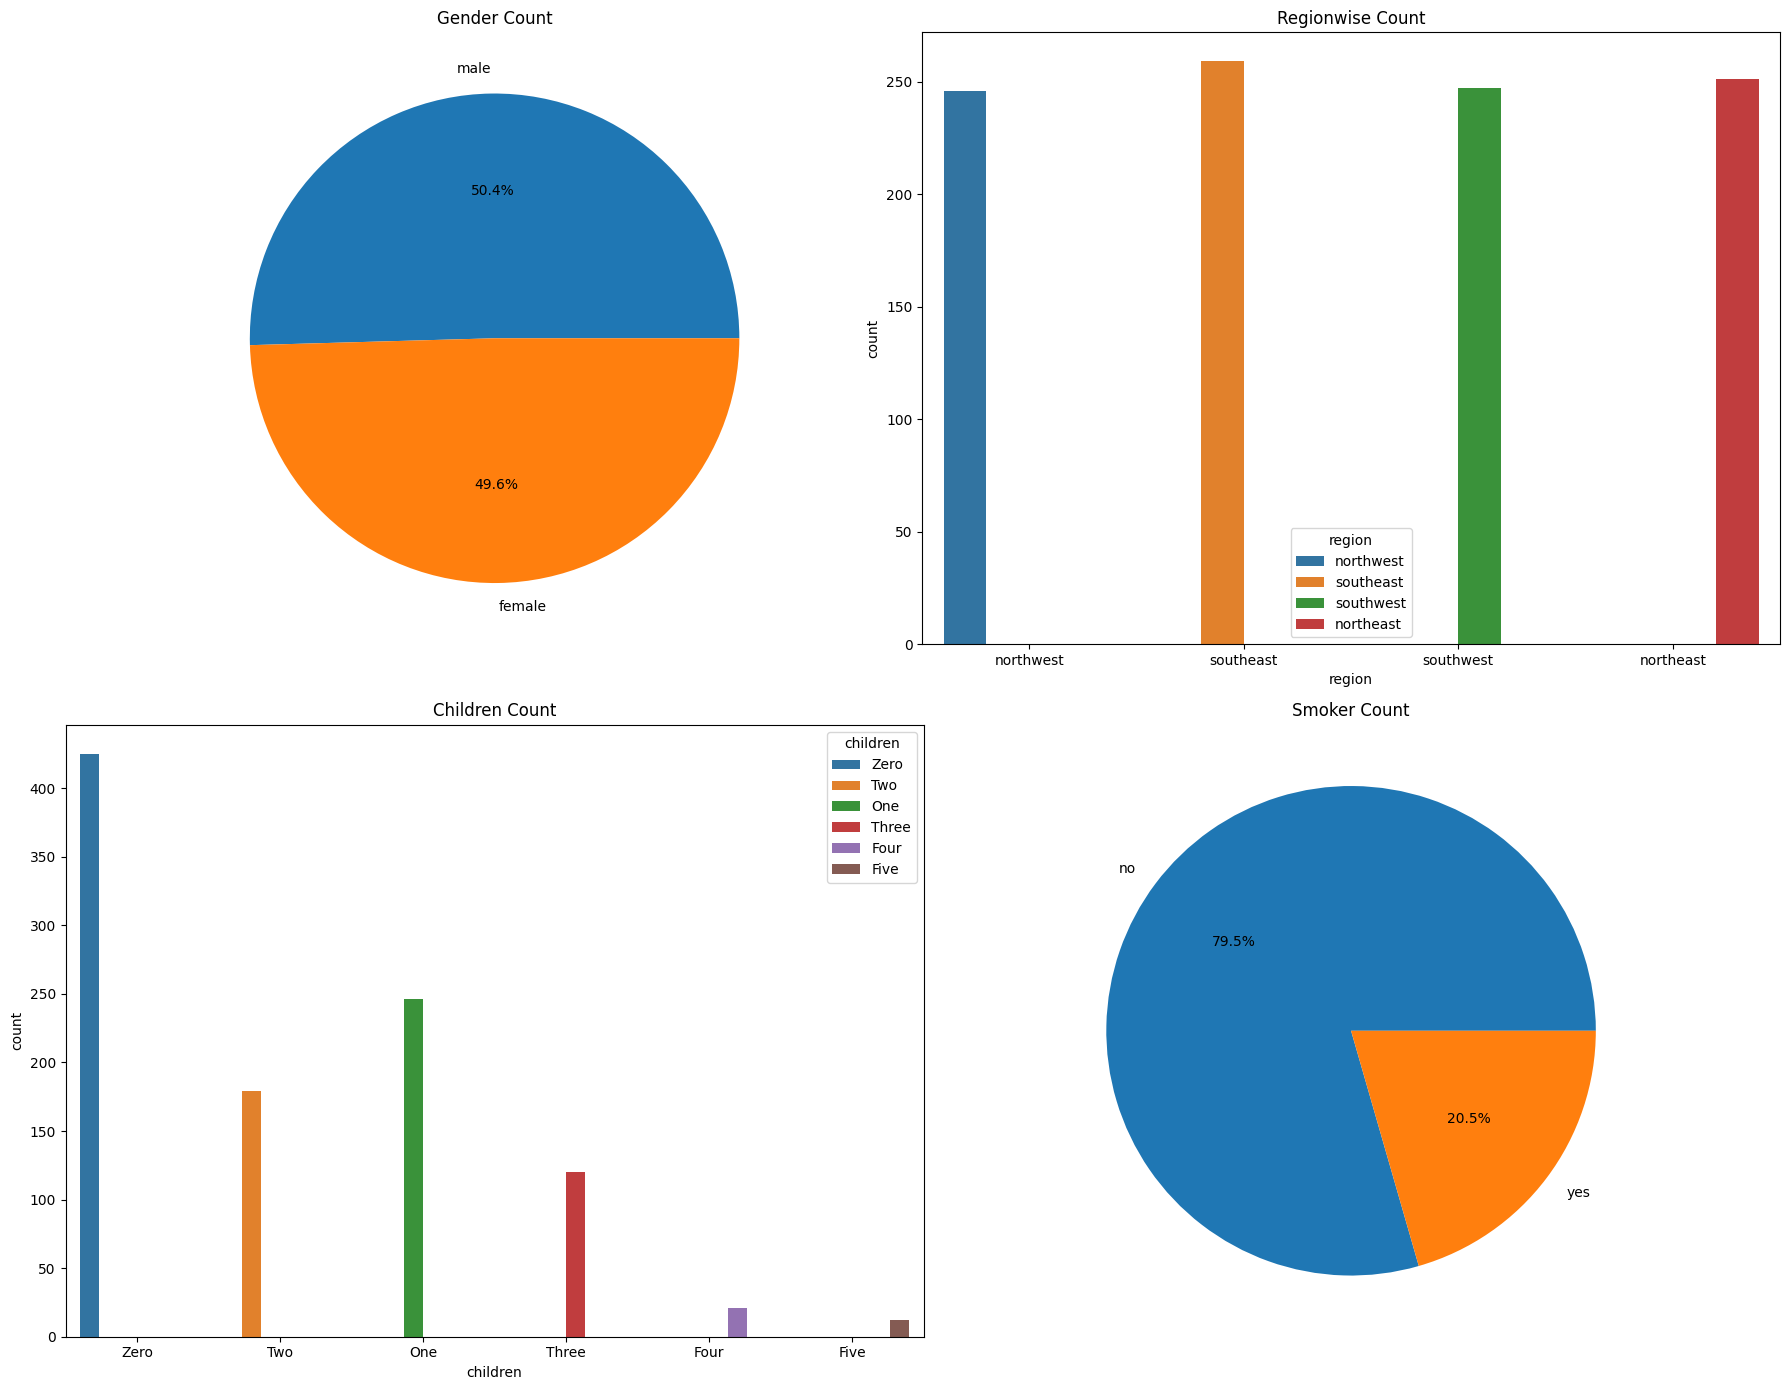

In [14]:
# Create subplots
fig,axes = plt.subplots(2, 2, figsize=(18,14))

#Plot 1 Gender Distribution
gender_count=data_train["sex"].value_counts()
axes[0,0].pie(gender_count,labels=gender_count.index,autopct='%1.1f%%')
axes[0,0].set_title("Gender Count")

#plot 2 Regionwise distribution
sns.countplot(data=data_train['region'], x=data_train['region'],hue=data_train['region'], ax=axes[0,1])
axes[0,1].set_title("Regionwise Count")

#plot 3 Children count
sns.countplot(data=data_train['children'],x=data_train['children'],hue=data_train['children'],ax=axes[1,0])
axes[1,0].set_title("Children Count")

#plot 4 Smoker Count
smoker_count=data_train['smoker'].value_counts()
axes[1,1].pie(smoker_count,labels=smoker_count.index,autopct='%1.1f%%')
axes[1,1].set_title("Smoker Count")

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

**Observation from the above plot are follows:**

*   the dataset collected of equal distribution towards Gender and Region
*   Insurance purchased by non-smokers are more than smokers

*   more than  half of the dataset consist of children count as zero, one.

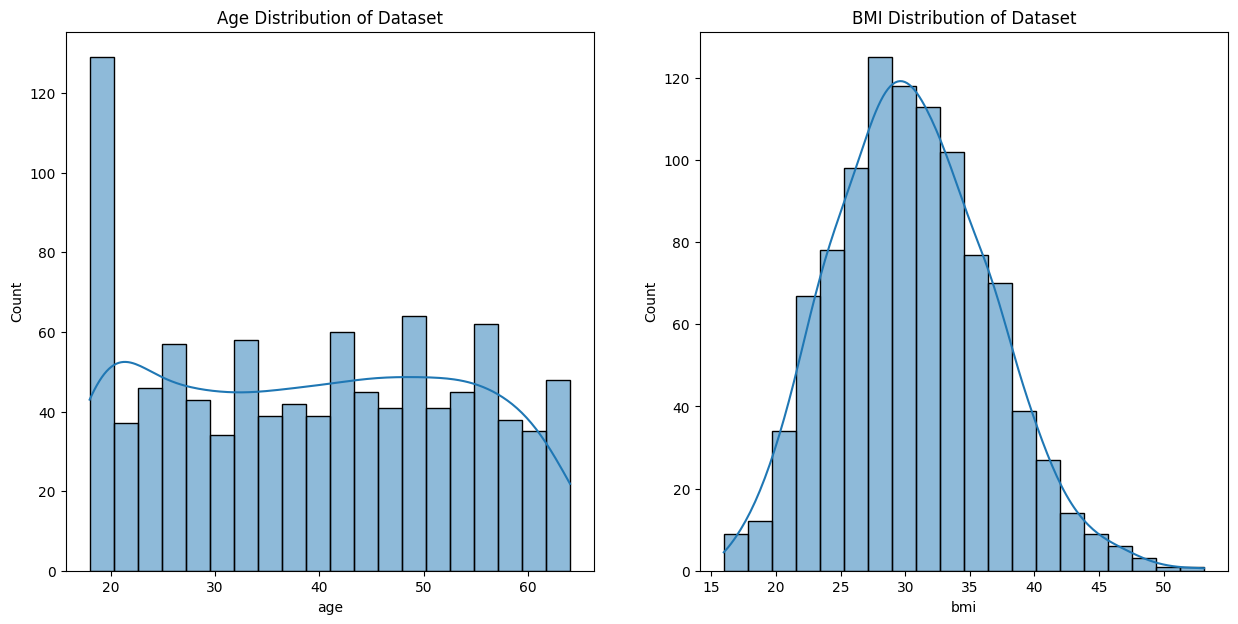

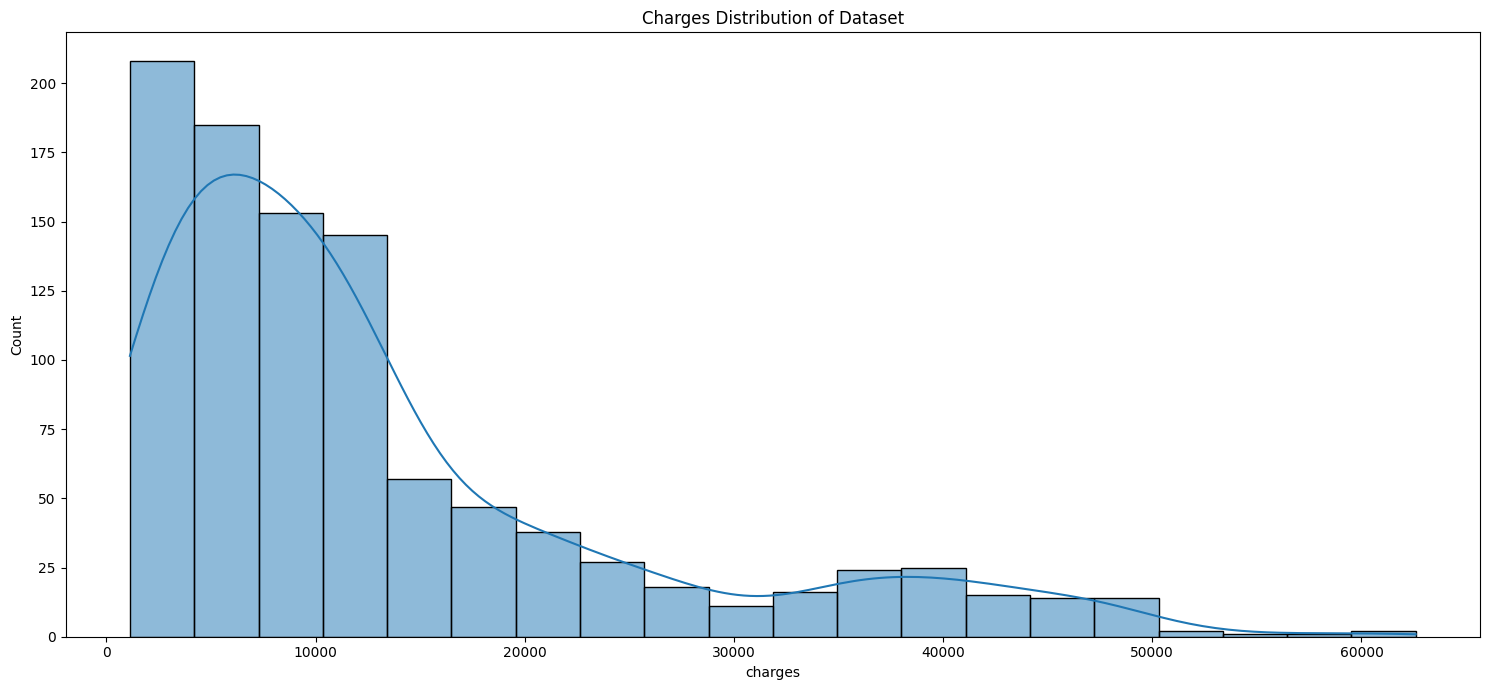

In [15]:
fig1,axes1=plt.subplots(1,2,figsize=(15,7))
#plot 1 age distribution
sns.histplot(data=data_train['age'],x=data_train['age'],kde=True,ax=axes1[0],bins=20)
axes1[0].set_title("Age Distribution of Dataset")
#plot 2 bmi distribution
sns.histplot(data=data_train['bmi'],x=data_train['bmi'],kde=True, ax=axes1[1],bins=20)
axes1[1].set_title("BMI Distribution of Dataset")
fig2=plt.figure(figsize=(15,7))
sns.histplot(data=data_train['charges'],x=data_train['charges'],kde=True,bins=20)
plt.title("Charges Distribution of Dataset")
# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

**Observation from the above plot are follows:**

- the dataset consist of all the age groups

- BMI distribution is normal in the dataset

- In charges column  most of the premium is ranged below 13500


**Bi-Variant Analysis**

In [16]:
#Feature Engineering Converting bmi to categorical variable
def bmi_cat(d):
  if d<18.5:
    return "Under Weight"
  elif ((d >= 18.5) and (d <= 24.9)) :
    return "Normal Weight"
  elif ((d>25) and (d<=29.9)):
    return "Over Weight"
  elif d>30 :
    return "Obese Weight"

In [17]:
data_train["bmi_category"]=data_train['bmi'].apply(lambda x: "none")

In [18]:
for i, j in data_train.iterrows():
  data_train.at[i,'bmi_category']=bmi_cat(j["bmi"])

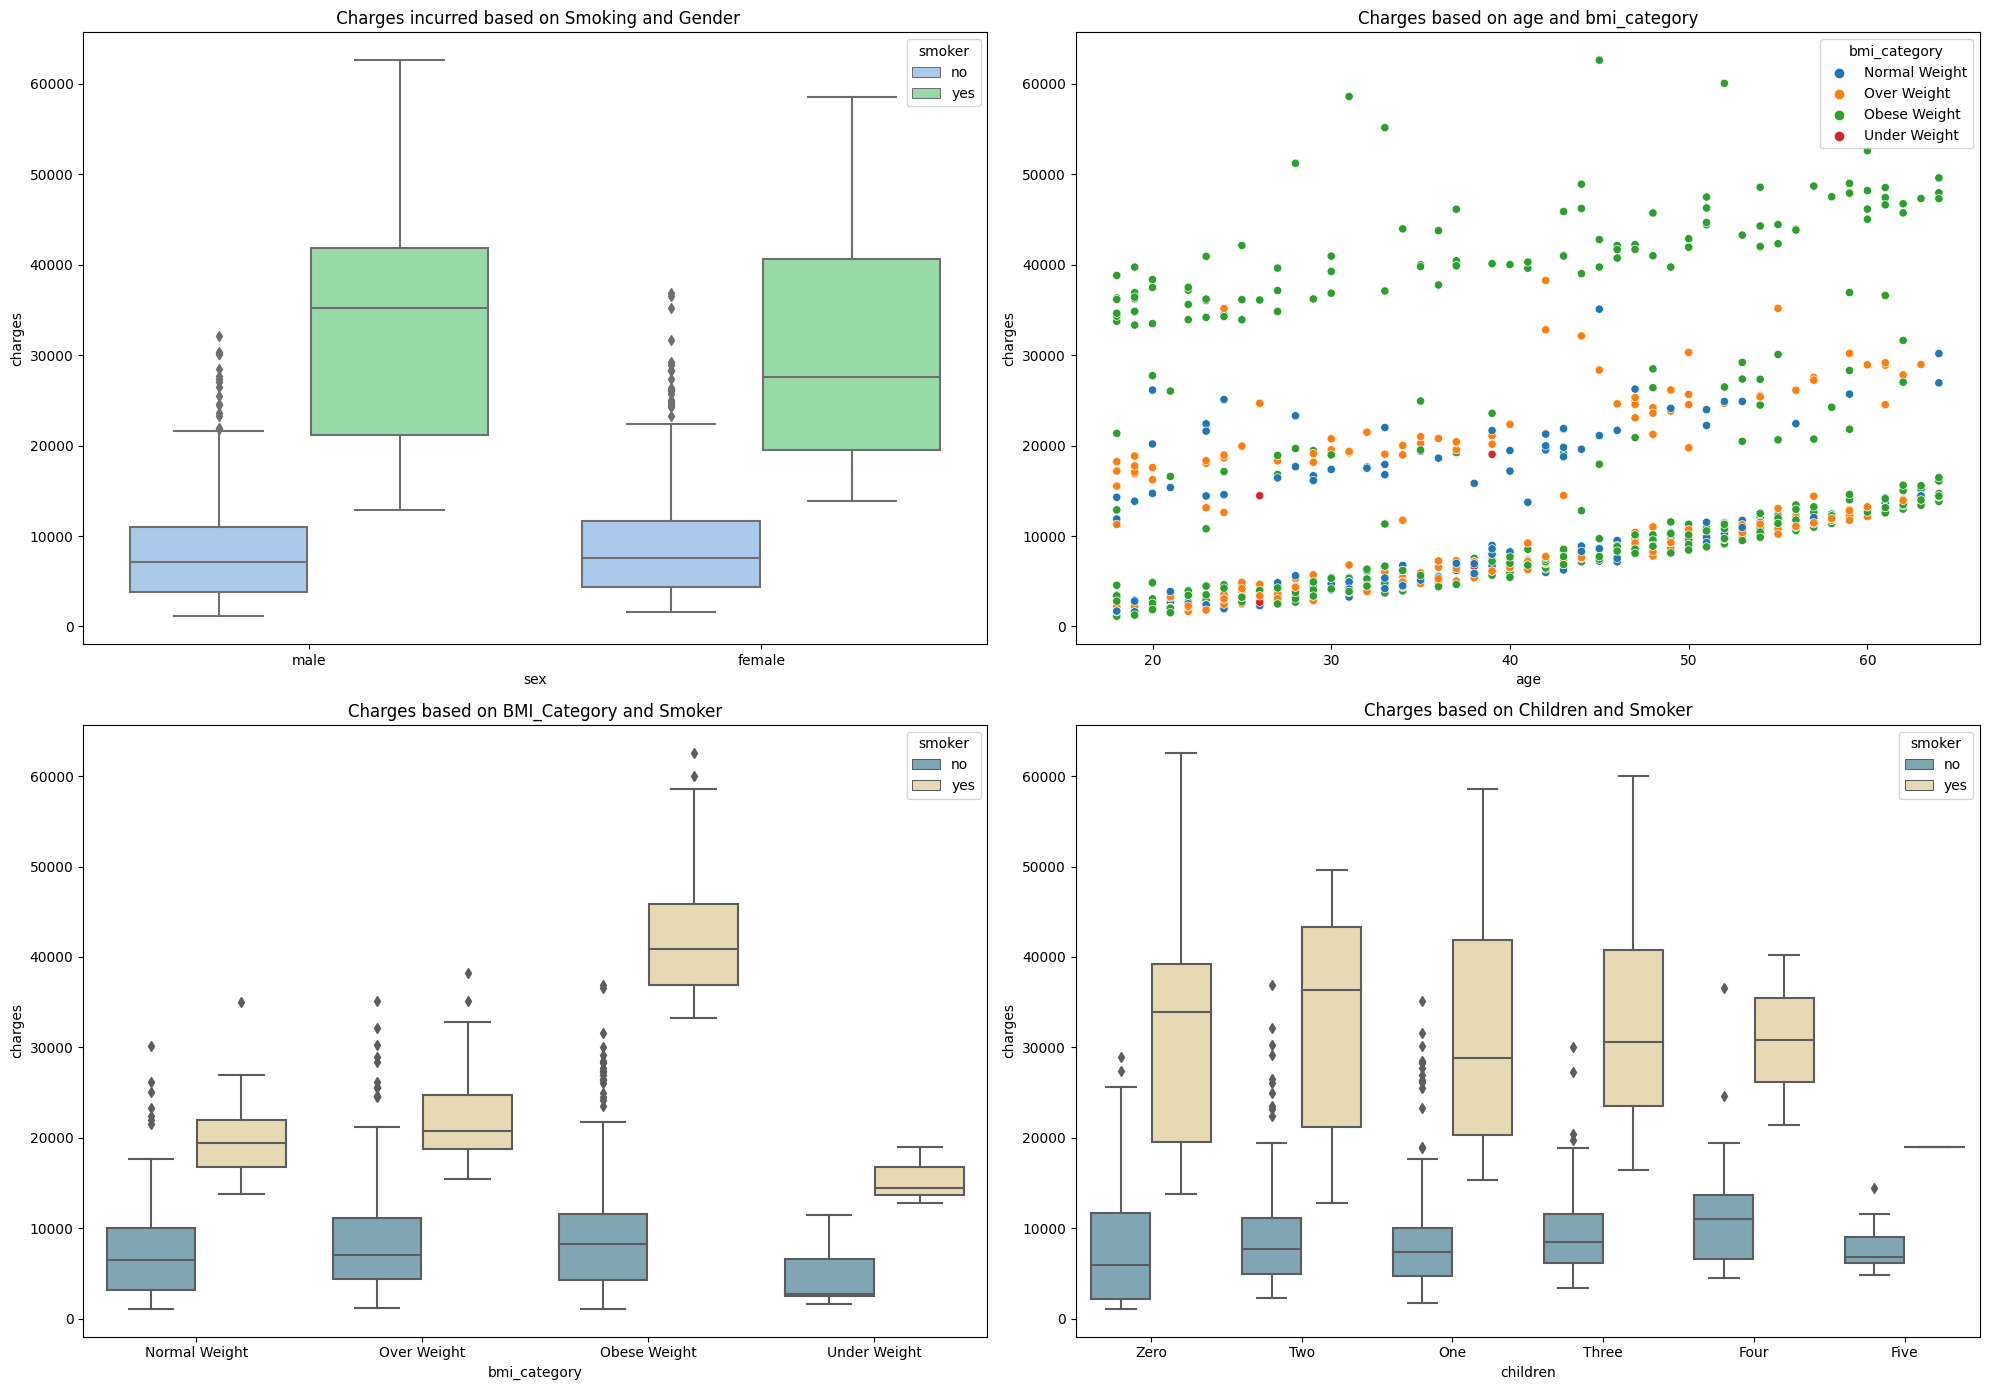

In [19]:
#Charges incurred based on Smoking and Gender
fig,axes=plt.subplots(2,2,figsize=(20,14))
sns.boxplot(data=data_train,x='sex',y='charges',hue='smoker',palette='pastel6',ax=axes[0,0])
axes[0,0].set_title(" Charges incurred based on Smoking and Gender")
sns.scatterplot(data=data_train,x='age',y='charges',hue='bmi_category',ax=axes[0,1])
axes[0,1].set_title("Charges based on age and bmi_category")
sns.boxplot(data=data_train,x='bmi_category',y='charges',hue='smoker',palette='blend:#7AB,#EDA',ax=axes[1,0])
axes[1,0].set_title("Charges based on BMI_Category and Smoker")
sns.boxplot(data=data_train,x='children',y='charges',hue='smoker',palette='blend:#7AB,#EDA',ax=axes[1,1])
axes[1,1].set_title("Charges based on Children and Smoker")
# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

 									 Distribution of Term Policy Charges
************************************************************************************************************************************************************************************


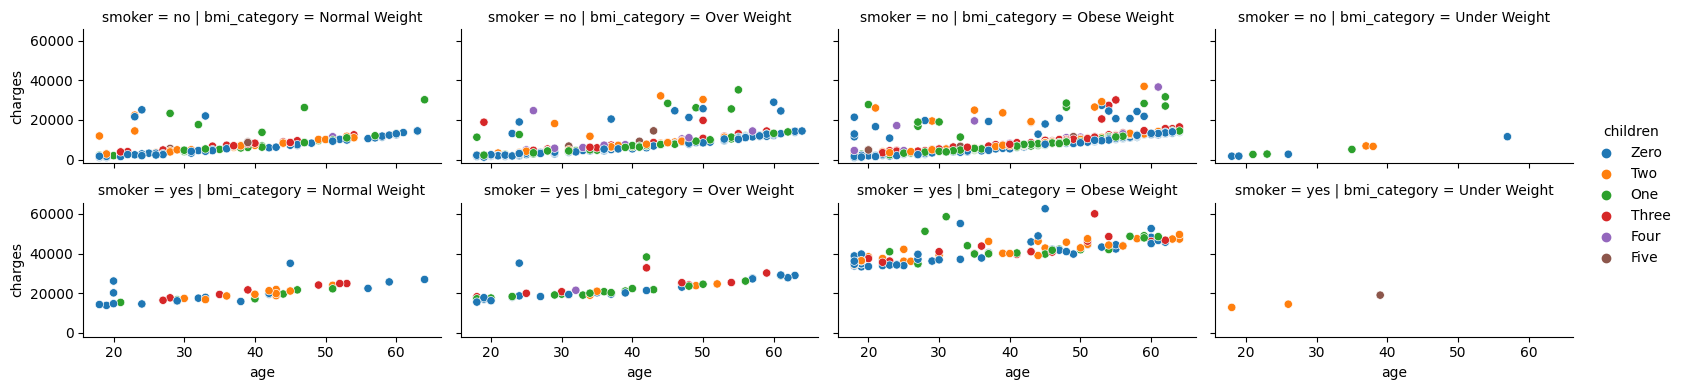

In [20]:
#age vs charges
print(" \t\t\t\t\t\t\t\t\t Distribution of Term Policy Charges")
print('*'*180)
sns.relplot(data=data_train,x='age',y='charges',hue='children',col="bmi_category",row='smoker',palette='tab10',height=2, aspect=2)
# Show the plots
#plt.xlabel("",fontsize=12)
plt.show()

**Observation**

- BMI feature is converted to 4 caterogries based on the International Standards for easy understanding.
- Premium charges are more for smokers than non-smokers.
- Insurance premium charges increases as on age increases.

---
<a name = Section6></a>
# **6. Premium Prediction Model Development & Evaluation**<br>
---
<a name = Section61></a>
**6.2  Features Selection**




*   choosing the best features for prediction

        *  BMI is converted as categorical variable, drop BMI Column.



In [21]:
data_train.drop(labels=['bmi'],axis=1,inplace=True)
print(data_train.head())

   age     sex children smoker     region    id      charges   bmi_category
0   24    male     Zero     no  northwest   693   2352.96845  Normal Weight
1   28  female      Two     no  southeast  1297   4340.44090    Over Weight
2   51    male      One     no  southwest   634   9391.34600   Obese Weight
3   47    male      One    yes  southeast  1022  42211.13820   Obese Weight
4   46  female      Two     no  southwest   178   8823.27900    Over Weight


<a name = Section62></a>
**6.2  Encoding Categorical Variables**

In [22]:
#Encoding the Categorical Variables
data_train_new=pd.get_dummies(data_train,columns=['sex','children','smoker','region','bmi_category'])

#printing shape of the dataset
print("\t\t After applying One Hot Encoding ")
print("*"*70)
print("Shape of the DataSet is : ",data_train_new.shape)
print("*"*70)

		 After applying One Hot Encoding 
**********************************************************************
Shape of the DataSet is :  (1003, 21)
**********************************************************************


 <a name = Section63></a>
**6.3  Splitting Data and Initializing Regressors**


In [23]:
# Seperating the dataset to X and Y
X=data_train_new.drop(labels=["charges",'id'],axis=1)
y=data_train_new['charges']


#spliting the dataset test and train
X_Train,X_Test,y_Train,y_Test=train_test_split(X,y,test_size=0.2,random_state=129)
print("\t\t After Spliting the DataSet ")
print("*"*70)
print("Shape of the X Train is : ",X_Train.shape)
print("Shape of the X Test  is : ",X_Test.shape)
print("Shape of the y Train is : ",y_Train.shape)
print("Shape of the y Test  is : ",y_Test.shape)
print("*"*70)

		 After Spliting the DataSet 
**********************************************************************
Shape of the X Train is :  (802, 19)
Shape of the X Test  is :  (201, 19)
Shape of the y Train is :  (802,)
Shape of the y Test  is :  (201,)
**********************************************************************


<a name = Section64></a>
**6.4 Training Regressors and Evaluating R2 Scores**

In [24]:
#model instantiation
lr=LinearRegression()
dt=DecisionTreeRegressor(random_state=129)
rf=RandomForestRegressor(random_state=129)
# Initialize a list of regressor objects
regression_list=[lr,dt,rf]
# Create an empty list to append R2 scores and regressor names
train_r2_scores = []
test_r2_scores = []
reg_names = []


# Train regressors over the train data and append R2 scores to the empty lists
for reg in regression_list:
    # Fit the train data to the regressor object
    reg.fit(X_Train, y_Train)

    # Predict the train and test labels
    train_preds = reg.predict(X_Train)
    test_preds = reg.predict(X_Test)

    # Calculate the train and test R2 scores
    train_r2 = r2_score(y_Train, train_preds)
    test_r2 = r2_score(y_Test, test_preds)

    # Append train and test R2 scores to the empty lists
    train_r2_scores.append(np.round(a=train_r2, decimals=4))
    test_r2_scores.append(np.round(a=test_r2, decimals=4))
    reg_names.append(reg.__class__.__name__)

# Create an R2 score dataframe from the scores and names list
r2_score_frame = pd.DataFrame(data={'Training Set R2 Scores': train_r2_scores, 'Test Set R2 Scores': test_r2_scores}, index=reg_names)
r2_score_frame

,Training Set R2 Scores,Test Set R2 Scores
LinearRegression,0.7486,0.7584
DecisionTreeRegressor,0.9872,0.7097
RandomForestRegressor,0.9665,0.8564


- Choosing the best Regression technique based on R-Square Test

In [25]:
best_index = np.argmax(test_r2_scores)
best_regressor_name = reg_names[best_index]
best_regressor = regression_list[best_index]

- Concatenating training and testing sets
- Retrain the best regressor on the combined dataset
- Predict on the Test set

In [26]:

# Merge the training and testing sets
x_combined = pd.concat([X_Train, X_Test], axis=0)
y_combined = pd.concat([y_Train, y_Test], axis=0)

# Retrain the best regressor on the combined dataset
best_regressor.fit(x_combined, y_combined)

# Predict on the Test set
X_Test_predictions = best_regressor.predict(X_Test)

# Calculate evaluation metrics
r2 = r2_score(y_Test, X_Test_predictions)

# Print the metrics
print("The R-Square Test on complete Training DataSet")
print('*'*40)
print("\t\t R2 Score:", round(r2, 2))
print('*'*40)

The R-Square Test on complete Training DataSet
****************************************
		 R2 Score: 0.98
****************************************


---
<a name = Section7></a>
# **7. Submission**<br>
---

**- converting the Actual Test DataSet same as Train DataSet**

In [27]:
data_test['children'].replace([0,1,2,3,4,5],["Zero",'One','Two','Three','Four','Five'],inplace=True)

In [28]:
data_test["bmi_category"]=data_test['bmi'].apply(lambda x: "none")

In [29]:
for i, j in data_test.iterrows():
  data_test.at[i,'bmi_category']=bmi_cat(j["bmi"])

In [30]:
data_test.drop(labels=['bmi'],axis=1,inplace=True)
data_test_new=pd.get_dummies(data_test,columns=['sex','children','smoker','region','bmi_category'])

In [31]:
data_test_new.drop(labels=['id'],axis=1,inplace=True)

- Using the best regression technique from the above and predicting the Insurance Charges
- Storing the prediction results to the submission.csv

In [32]:
# Use the best regressor after grid search to predict on df_test
test_predictions = best_regressor.predict(data_test_new)

# Create a new DataFrame for submission
submission_df = pd.DataFrame()

# Add 'Item_Identifier' and 'Outlet_Identifier' columns from df_test_og to the submission DataFrame
submission_df['id'] = data_test['id']

# Add the predicted values column to the submission DataFrame
submission_df['charges'] = test_predictions

# Save the submission DataFrame to a CSV file with header & without index
submission_df.to_csv('submission.csv', index=False, header=False)